<a href="https://colab.research.google.com/github/naidu199/DeepLearning/blob/master/Autoencoder_with_Three_Encoder_and_Decoder_Layers_(Unsupervised_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),

])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)



NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dense1): Linear(in_features=784, out_features=256, bias=True)
  (dense2): Linear(in_features=256, out_features=128, bias=True)
  (dense3): Linear(in_features=128, out_features=56, bias=True)
  (output): Linear(in_features=56, out_features=10, bias=True)
)
Epoch [1/10], Loss: 1.5273
Epoch [2/10], Loss: 1.4892
Epoch [3/10], Loss: 1.4633
Epoch [4/10], Loss: 1.4926
Epoch [5/10], Loss: 1.4612
Epoch [6/10], Loss: 1.4868
Epoch [7/10], Loss: 1.4695
Epoch [8/10], Loss: 1.4697
Epoch [9/10], Loss: 1.4612
Epoch [10/10], Loss: 1.4612
Test accuracy: 0.9696


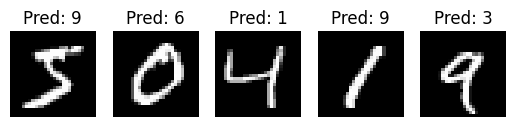

In [8]:
# Define the Neural Network Model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.dense1 = nn.Linear(28*28, 256)
        self.dense2 = nn.Linear(256, 128)
        self.dense3 = nn.Linear(128, 56)
        self.output = nn.Linear(56, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.dense1(x))
        x = torch.relu(self.dense2(x))
        x = torch.relu(self.dense3(x))
        x = torch.softmax(self.output(x), dim=1)
        return x

model = NeuralNetwork()
print(model)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the Model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluating the Model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_acc = correct / total
print(f"Test accuracy: {test_acc:.4f}")

# Making Predictions
model.eval()
predicted_classes = []
with torch.no_grad():
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        predicted_classes.extend(predicted.numpy())

# Visualize Results (Optional)
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_dataset.data[i], cmap='gray')
    plt.title(f'Pred: {predicted_classes[i]}')
    plt.axis('off')
plt.show()


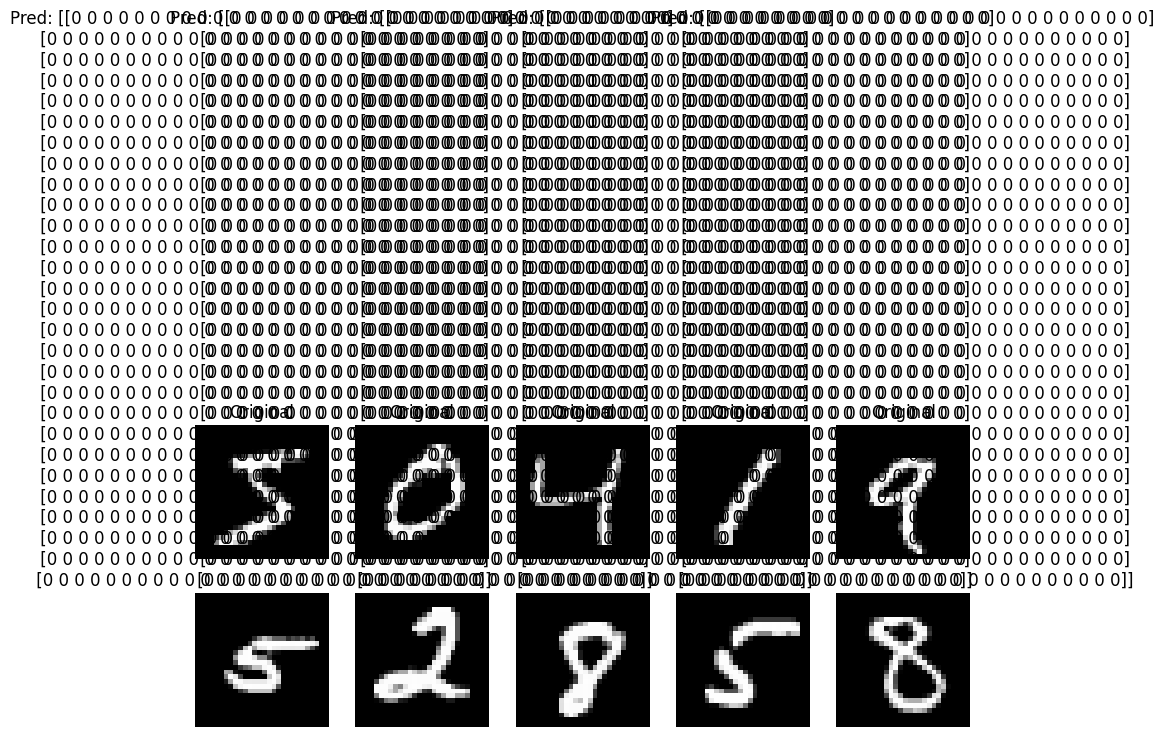

In [17]:
import matplotlib.pyplot as plt

def visualize_predictions(model, data_loader, dataset, num_images=5, filename='predicted_images.png'):
    # Set the model to evaluation mode
    model.eval()
    predicted_classes = []

    # Make predictions
    with torch.no_grad():
        for images, _ in data_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            predicted_classes.extend(predicted.numpy())
            break  # Only take the first batch for visualization

    # Visualize Results
    plt.figure(figsize=(10, 4))
    for i in range(num_images):
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(dataset.data[i], cmap='gray')
        plt.title("Original")
        plt.axis('off')

        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(images[i].view(28, 28).numpy(), cmap='gray')
        plt.title(f'Pred: {predicted_classes[i]}')
        plt.axis('off')

    # Save the plot
    plt.savefig(filename)
    plt.show()

# Example usage
visualize_predictions(model, train_loader, train_dataset)


In [4]:
print(model.parameters())

<generator object Module.parameters at 0x78e4af593990>


In [9]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),
            nn.Unflatten(1, (1, 28, 28))
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

model = Autoencoder()
print(model)


Autoencoder(
  (encoder): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=32, bias=True)
    (6): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=784, bias=True)
    (5): Sigmoid()
    (6): Unflatten(dim=1, unflattened_size=(1, 28, 28))
  )
)


In [10]:
# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, _ in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, images)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 0.2176
Epoch [2/10], Loss: 0.1443
Epoch [3/10], Loss: 0.1277
Epoch [4/10], Loss: 0.1189
Epoch [5/10], Loss: 0.1126
Epoch [6/10], Loss: 0.1079
Epoch [7/10], Loss: 0.1046
Epoch [8/10], Loss: 0.1023
Epoch [9/10], Loss: 0.1006
Epoch [10/10], Loss: 0.0992


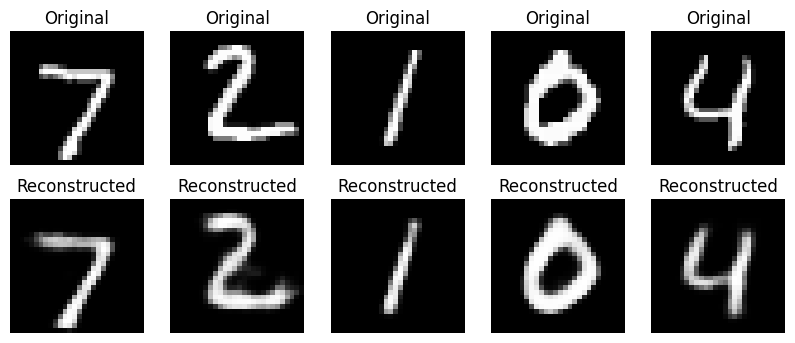

In [12]:
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    for images, _ in test_loader:
        outputs = model(images)
        break

# Visualize some results
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images[i].view(28, 28).numpy(), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(outputs[i].view(28, 28).numpy(), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()


In [13]:
import torch.nn.functional as F

def compute_mse(original, reconstructed):
    return F.mse_loss(reconstructed, original).item()


In [14]:
model.eval()
total_mse = 0.0
num_batches = 0

with torch.no_grad():
    for images, _ in test_loader:
        outputs = model(images)
        mse = compute_mse(images, outputs)
        total_mse += mse
        num_batches += 1

average_mse = total_mse / num_batches
print(f"Average MSE on test set: {average_mse:.4f}")


Average MSE on test set: 0.0119


In [15]:
def compute_accuracy(original, reconstructed, threshold=0.1):
    diff = torch.abs(original - reconstructed)
    correct = torch.sum(diff < threshold).item()
    total = torch.numel(diff)
    return correct / total

model.eval()
total_correct = 0
total_pixels = 0

with torch.no_grad():
    for images, _ in test_loader:
        outputs = model(images)
        correct = compute_accuracy(images, outputs)
        total_correct += correct * images.size(0) * images.size(2) * images.size(3)
        total_pixels += images.size(0) * images.size(2) * images.size(3)

accuracy = total_correct / total_pixels
print(f"Reconstruction accuracy on test set: {accuracy:.4f}")


Reconstruction accuracy on test set: 0.8849


In [16]:
# Evaluate MSE
model.eval()
total_mse = 0.0
num_batches = 0

with torch.no_grad():
    for images, _ in test_loader:
        outputs = model(images)
        mse = compute_mse(images, outputs)
        total_mse += mse
        num_batches += 1

average_mse = total_mse / num_batches
print(f"Average MSE on test set: {average_mse:.4f}")

# Compute accuracy based on a threshold
def compute_accuracy(original, reconstructed, threshold=0.1):
    diff = torch.abs(original - reconstructed)
    correct = torch.sum(diff < threshold).item()
    total = torch.numel(diff)
    return correct / total

# Evaluate accuracy
model.eval()
total_correct = 0
total_pixels = 0

with torch.no_grad():
    for images, _ in test_loader:
        outputs = model(images)
        correct = compute_accuracy(images, outputs)
        total_correct += correct * images.size(0) * images.size(2) * images.size(3)
        total_pixels += images.size(0) * images.size(2) * images.size(3)

accuracy = total_correct / total_pixels
print(f"Reconstruction accuracy on test set: {accuracy:.4f}")


Average MSE on test set: 0.0119
Reconstruction accuracy on test set: 0.8849
